<a href="https://colab.research.google.com/github/abdelrahmanfekri/FacewatchNotebook/blob/main/DiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program utilizes the Roboflow tool to label and segment images of
the user's face, specifically focusing on interesting parts such as the eyes, head, nose, lips, and cheeks. The data is annotated with bounding boxes around these features to enable accurate analysis of each area.

The following are the different classes that the program can detect and identify:

1- Moles in face - This class identifies and labels moles on the user's face. Moles are usually benign, but in rare cases, they can be cancerous. Early detection is essential for successful treatment, making this feature valuable for medical professionals.

2- Dehydration cracked lips - This class detects and labels the presence of dehydration-induced cracks in the user's lips. Dehydration can lead to dryness and cracking of the lips, which can be a sign of an underlying health issue that needs to be addressed.

3- Jaundice - This class identifies and labels the presence of jaundice, which is a yellow discoloration of the skin and eyes caused by a buildup of bilirubin in the blood. Jaundice can be a symptom of various medical conditions, ranging from liver disease to certain types of cancer.

4- Melasma on face - This class detects and labels the presence of melasma, which is a common skin condition that causes brown or gray patches on the face. Melasma is often caused by hormonal changes and is more common in women than men.

5- Drooping eyelid - This class identifies and labels the presence of a drooping eyelid, which is a condition that can affect one or both eyes. A drooping eyelid can be caused by several factors, including nerve damage, muscle weakness, and aging.

6- Alopecia hair loss - This class detects and labels the presence of alopecia, which is a condition that causes hair loss on the scalp and other parts of the body. Alopecia can be caused by genetics, autoimmune disorders, and other factors.

7- Butterfly rash - This class identifies and labels the presence of a butterfly-shaped rash on the user's face. This type of rash is often associated with autoimmune disorders such as lupus.

8- Puffy eyes - This class detects and labels the presence of puffiness around the user's eyes. Puffy eyes can be caused by various factors, including allergies, lack of sleep, and aging.

9- Xanthelasma yellow spot - This class identifies and labels the presence of yellowish spots on the user's eyelids. These spots are often caused by a buildup of cholesterol and can be a sign of an underlying health condition.

10- Sores in face - This class detects and labels the presence of sores or lesions on the user's face. Sores can be caused by various factors, including infections, allergies, and skin disorders.

[for more information](https://www.webmd.com/skin-problems-and-treatments/ss/slideshow-face-your-health)



In [ ]:
!curl -L "https://app.roboflow.com/ds/qX9HV9SxTr?key=WAnMXfbJMk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
import numpy as np

# Define directories containing data

train_dir = "/content/train"
test_dir = "/content/test"


In [ ]:
"""
Image: The name of the image file.
x1: The x-coordinate of the top-left corner of the bounding box.
y1: The y-coordinate of the top-left corner of the bounding box.
x2: The x-coordinate of the bottom-right corner of the bounding box.
y2: The y-coordinate of the bottom-right corner of the bounding box.
Label: The label of the object within the bounding box.
"""
names = ["Image", "x1", "y1", "x2", "y2", "Label"]
train_annot = pd.read_csv(f"{train_dir}/_annotations.csv", names= names)
test_annot = pd.read_csv(f"{test_dir}/_annotations.csv", names= names)

In [ ]:
train_annot.head(10)

,Image,x1,y1,x2,y2,Label
0,Sores-in-face-images_13_jpg.rf.70cd47ac75e48ca...,38,26,131,125,Sores in face
1,Sores-in-face-images_13_jpg.rf.70cd47ac75e48ca...,20,61,159,137,Sores in face
2,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,46,49,69,60,Normal
3,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,79,49,107,62,Normal
4,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,43,61,63,70,Normal
5,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,59,73,95,85,Normal
6,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,88,61,110,71,Normal
7,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,58,30,92,44,Normal
8,face-images_2_jpg.rf.70d4f0bb1564476f2d6e6423a...,38,30,109,95,Normal
9,Puffy-Eyes-face-images_43_jpg.rf.722c41900ff40...,30,32,76,55,Puffy Eyes Face


In [ ]:
import cv2

def get_data(data_annot, dir):
  data = []
  for index, row in data_annot.iterrows():
    img_path = row["Image"]
    x1, y1, x2, y2 = row["x1"], row["y1"], row["x2"], row["y2"]
    label = row["Label"]
    # Load image using OpenCV
    img = cv2.imread(f"{dir}/{img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert image from BGR to RGB
    cropped_img = img[y1:y2,x1:x2]
    resized_img = cv2.resize(cropped_img, (160,160))
    data.append((resized_img, label))
  return data

train_data = get_data(train_annot, train_dir)
test_data = get_data(test_annot, test_dir)

In [ ]:
X = [[], []]
y = [[], []]

def normalize_image(img):
    img = img.astype(np.float32)
    # scale pixel values between 0 and 1
    img /= 255.0
    # normalize using mean and standard deviation
    img -= np.mean(img)
    img /= np.std(img)
    return img

data = [train_data, test_data]
for i in range(len(X)):
  for img, label in data[i]:
    normalized_img = normalize_image(img)
    X[i].append(normalized_img)
    y[i].append(label)

In [ ]:
X_train, X_test = np.array(X[0]), np.array(X[1])
y_train, y_test = np.array(y[0]), np.array(y[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2109, 160, 160, 3)
(260, 160, 160, 3)
(2109,)
(260,)


In [ ]:
unique_values, counts = np.unique(y_train, return_counts=True)

print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: ['Alopecia Hair Loss' 'Butterfly Rash Face' 'Dehydration Cracked Libs'
 'Drooping Eyelid' 'Jaundice Yellowish Skin and Eyes' 'Melasma Face'
 'Moles Face' 'Normal' 'Puffy Eyes Face' 'Sores in face' 'Stroke Face'
 'Xanthelasma Yellow Spots on Your Eyelids']
Counts: [ 54 134  93 128 119 209 323 506 121 207  55 160]


In [ ]:
# Encode the labels as one-hot vectors
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
num_classes = len(encoder.classes_)

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

# Freeze some layers in the base model
for layer in vgg16.layers[:-1]:
    layer.trainable = False

num_classes = 12
model = keras.Sequential([
    vgg16,
    Flatten(),
    Dense(64, kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, kernel_initializer='he_normal'),
    Activation('elu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, kernel_initializer='he_normal'),
    Activation('softmax')
])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                819264    
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 37.8 MB/s eta 0:00:00


In [ ]:
import visualkeras

visualkeras.layered_view(model)# display using your system viewer

In [ ]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/diseaseDetectionModel.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

In [ ]:

callbacks = [checkpoint]

history  = model.fit(X_train,
          to_categorical(y_train),
          epochs=60,
          batch_size=10,
          validation_data=(X_test, to_categorical(y_test)),
          callbacks=callbacks,
          )

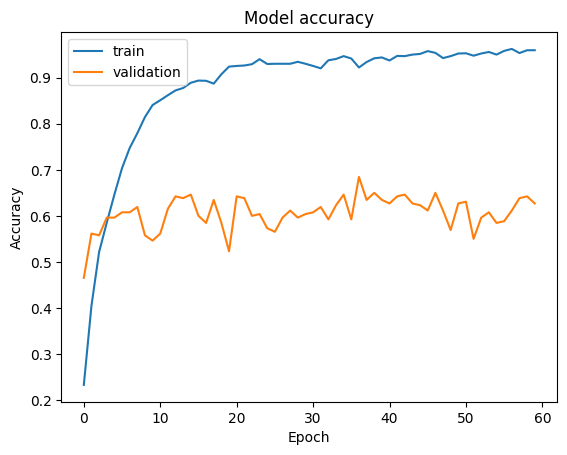

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

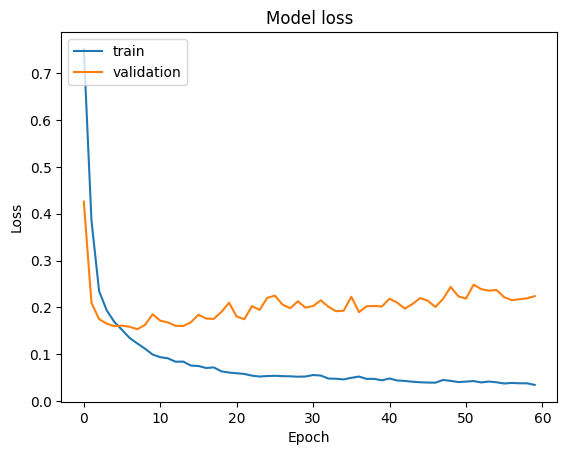

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/diseaseDetectionModel.h5")
# get the predicted class labels from the model predictions
y_pred = model.predict(X_train)
y_pred_labels = np.argmax(y_pred, axis=1)

66/66 [==============================] - 10s 103ms/step


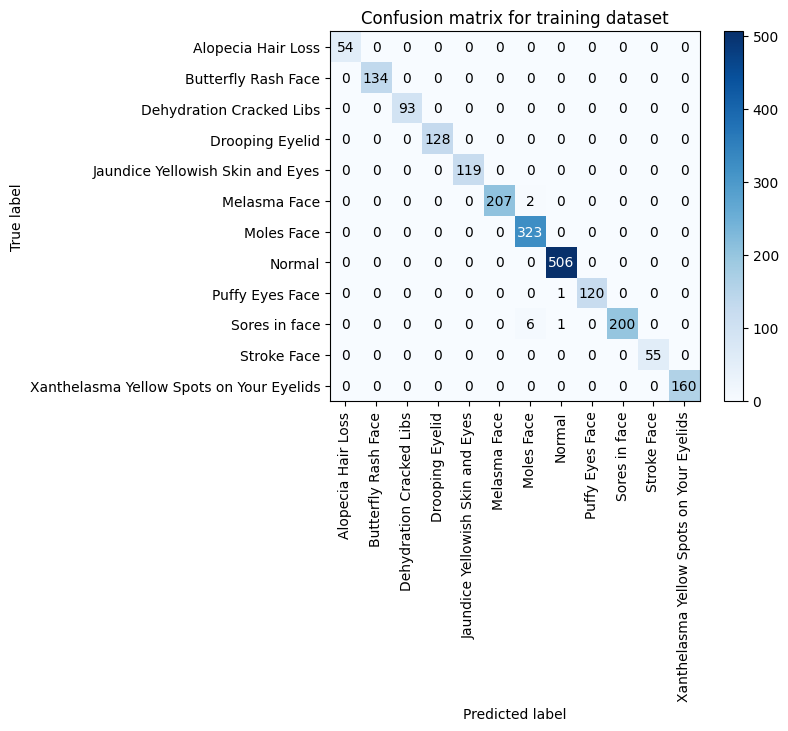

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
C = confusion_matrix(y_true=y_train, y_pred=y_pred_labels)

# plot the confusion matrix
plt.imshow(C, cmap=plt.cm.Blues)
plt.colorbar()

# add axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for training dataset')

# add tick labels for each axis
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, unique_values, rotation=90)
plt.yticks(tick_marks, unique_values)

# add count values in each cell
thresh = C.max() / 2.
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        count = f"{C[i, j]:.0f}"
        plt.text(j, i, count, ha="center", va="center",
                 color="white" if C[i, j] > thresh else "black")


# display the plot
plt.show()


In [ ]:
# get the predicted class labels from the model predictions y_test
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

9/9 [==============================] - 1s 157ms/step


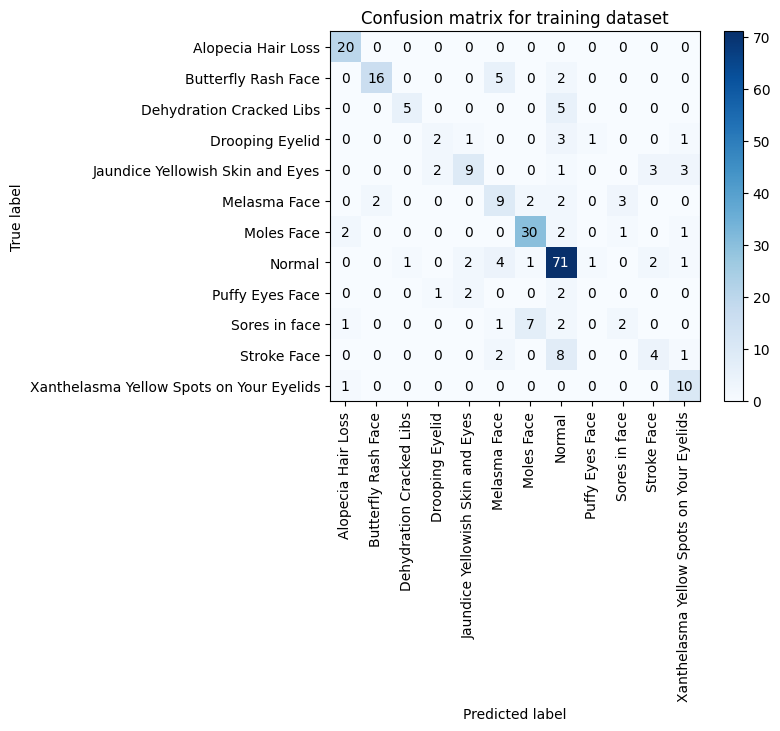

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
C = confusion_matrix(y_true=y_test, y_pred=y_pred_labels)

# plot the confusion matrix
plt.imshow(C, cmap=plt.cm.Blues)
plt.colorbar()

# add axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix for training dataset')

# add tick labels for each axis
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, unique_values, rotation=90)
plt.yticks(tick_marks, unique_values)

# add count values in each cell
thresh = C.max() / 2.
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        count = f"{C[i, j]:.0f}"
        plt.text(j, i, count, ha="center", va="center",
                 color="white" if C[i, j] > thresh else "black")


# display the plot
plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/diseaseDetectionModel.h5")


In [ ]:
import cv2
def predict(img):
  prediction = model.predict(img)
  return prediction

def normalize_image(img):
    img = img.astype(np.float32)
    # scale pixel values between 0 and 1
    img /= 255.0
    # normalize using mean and standard deviation
    img -= np.mean(img)
    img /= np.std(img)
    return img

img = cv2.imread("/content/test/moles-in-face_15_jpg.rf.fb4a4a9529e903ef0a33a8316dbe74c0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

unique_values = ['Alopecia Hair Loss','Butterfly Rash Face','Dehydration Cracked Libs',
 'Drooping Eyelid','Jaundice Yellowish Skin and Eyes','Melasma Face',
 'Moles Face','Normal','Puffy Eyes Face','Sores in face','Stroke Face',
 'Xanthelasma Yellow Spots on Your Eyelids']

img = cv2.resize(img, (160,160))
img = np.array([normalize_image(img)])
pred = model.predict(img)
print((pred*100).astype(int))
pred = np.argmax(pred)

print(unique_values[pred])

1/1 [==============================] - 1s 620ms/step
[[ 0  0  0  0 17  3 55  0  0  0 23  0]]
Moles Face
